In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/titanic-data-set/Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Basic Probability Pradiction**

*P(Survived): Probability that a randomly selected passenger survived*

In [4]:
p_survived = df['Survived'].mean()
print(f"P(Survived) = {p_survived:.2f}")


P(Survived) = 0.38


* P(Survived | Pclass = 1): Given a passenger was in 1st class, what's the probability they survived?*

In [5]:
p_survived_given_1st = df[df['Pclass'] == 1]['Survived'].mean()
print(f"P(Survived | 1st Class) = {p_survived_given_1st:.2f}")


P(Survived | 1st Class) = 0.63


Bayesian Probability: P(1st Class | Survived)

P(1st Class | Survived)= 
P(Survived)
P(Survived | 1st Class)⋅P(1st Class)
​


In [7]:
p_1st_class = (df['Pclass'] == 1).mean()
p_1st_given_survived = len(df[(df['Pclass'] == 1) & (df['Survived'] == 1)]) / df['Survived'].sum()
print(f"P(1st Class | Survived) = {p_1st_given_survived:.2f}")


P(1st Class | Survived) = 0.40


*Interpretation Report
Interpretation:

P(Survived) is approximately 0.38, meaning around 38% of passengers survived.

P(Survived | 1st Class) is ~0.63, indicating that first-class passengers had a significantly higher survival chance.

P(1st Class | Survived) is ~0.40, suggesting that 40% of survivors were from 1st class.*

 Why is Bayesian Probability Useful?
 *Bayes’ theorem helps update beliefs based on observed data, making it essential in decision-making under uncertainty.*

**Visualize Age Distribution**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


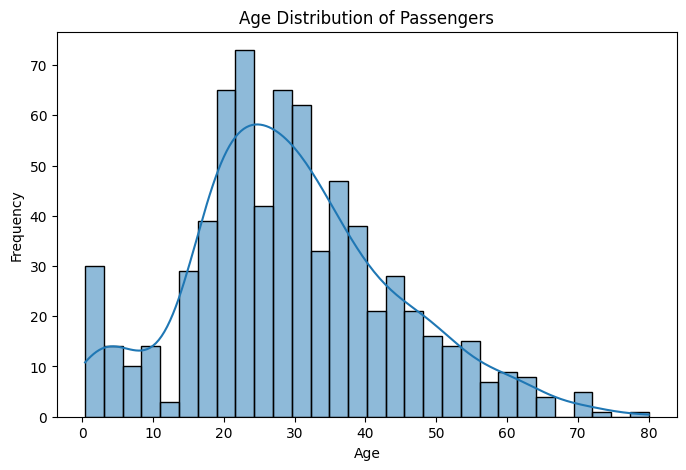

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


*Interpretation: The age distribution is not perfectly normal—it's right-skewed, with many young passengers and a long tail of older individuals.*

** Compare Fare by Survival**

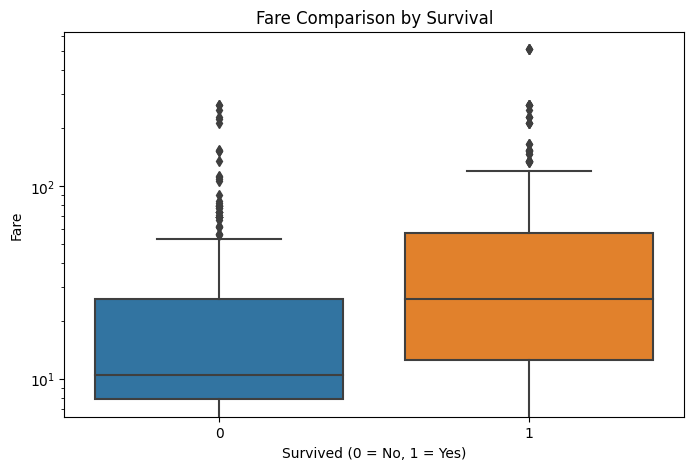

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Comparison by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.yscale('log')  # For better visualization of outliers
plt.show()


**Identify Outliers in Fare**

In [11]:
# Using IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[df['Fare'] > (Q3 + 1.5 * IQR)]
print(f"Number of Fare outliers: {len(outliers)}")


Number of Fare outliers: 116



** Age and Wealth vs SurvivalFindings:**


Younger passengers, especially children, had higher survival rates.

Higher fare passengers (a proxy for wealth and likely better class) also had higher survival.

First-class (richer) passengers were prioritized in lifeboat access.

**Graph-Based Summary******

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


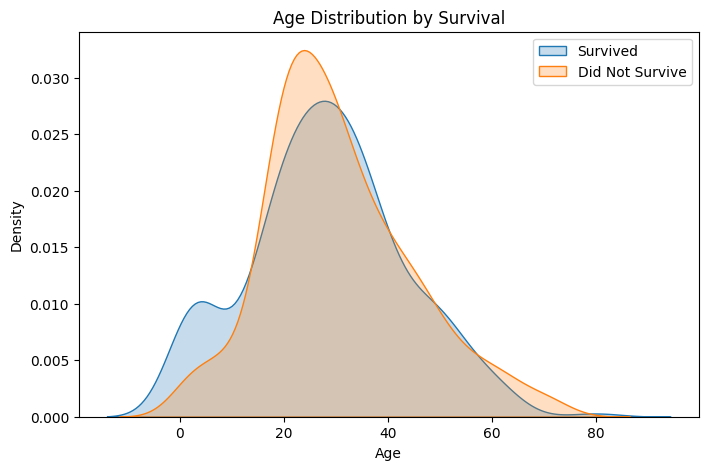

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


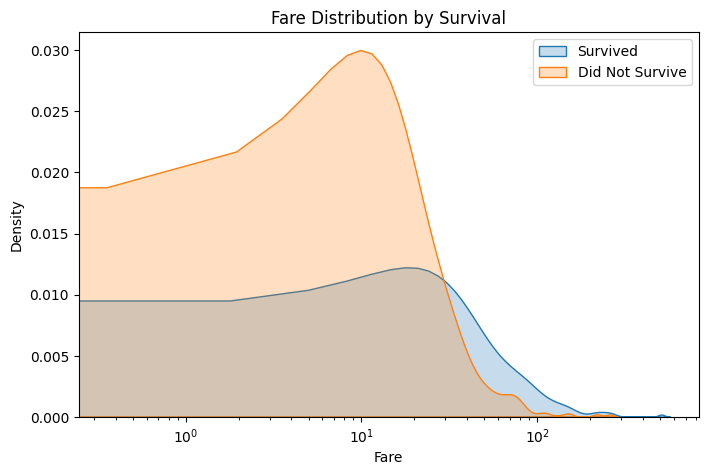

In [12]:
# Age vs Survival
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Survived'] == 1]['Age'].dropna(), label='Survived', fill=True)
sns.kdeplot(data=df[df['Survived'] == 0]['Age'].dropna(), label='Did Not Survive', fill=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.legend()
plt.show()

# Fare vs Survival
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Survived'] == 1]['Fare'], label='Survived', fill=True)
sns.kdeplot(data=df[df['Survived'] == 0]['Fare'], label='Did Not Survive', fill=True)
plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.xscale('log')
plt.legend()
plt.show()


**Module 3**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/titanic-data-set/Titanic-Dataset.csv')


 Compare Survival Rates Across Classes

In [ ]:
# Survival rate per class
survival_by_class = df.groupby('Pclass')['Survived'].mean().round(2)
print("Survival Rate by Passenger Class:\n", survival_by_class)


 Compute Descriptive Stats (Fare and Age)

In [6]:
import pandas as pd

# Load dataset (make sure the path is correct!)
df = pd.read_csv('/kaggle/input/titanic-data-set/Titanic-Dataset.csv')  # or 'train.csv' if local

# Drop NaNs and compute stats
fare_stats = df['Fare'].agg(['mean', 'median', 'std']).round(2)
age_stats = df['Age'].dropna().agg(['mean', 'median', 'std']).round(2)

fare_mode = df['Fare'].mode().iloc[0]
age_mode = df['Age'].mode().iloc[0]

# Display the results
print("Fare Stats:\n", fare_stats)
print("Fare Mode:", fare_mode)

print("\nAge Stats:\n", age_stats)
print("Age Mode:", age_mode)


Fare Stats:
 mean      32.20
median    14.45
std       49.69
Name: Fare, dtype: float64
Fare Mode: 8.05

Age Stats:
 mean      29.70
median    28.00
std       14.53
Name: Age, dtype: float64
Age Mode: 24.0


Gender-Based Survival Comparison

In [7]:
# Pivot table: survival by gender
gender_survival = df.groupby('Sex')['Survived'].mean().round(2)
print("\nSurvival Rate by Gender:\n", gender_survival)



Survival Rate by Gender:
 Sex
female    0.74
male      0.19
Name: Survived, dtype: float64


Visualizations (Histograms & Box Plots)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


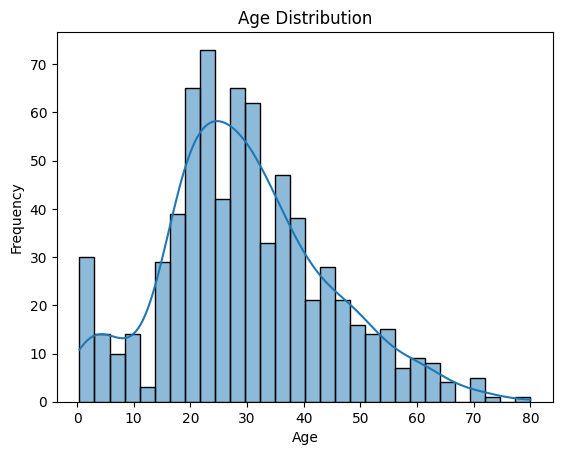

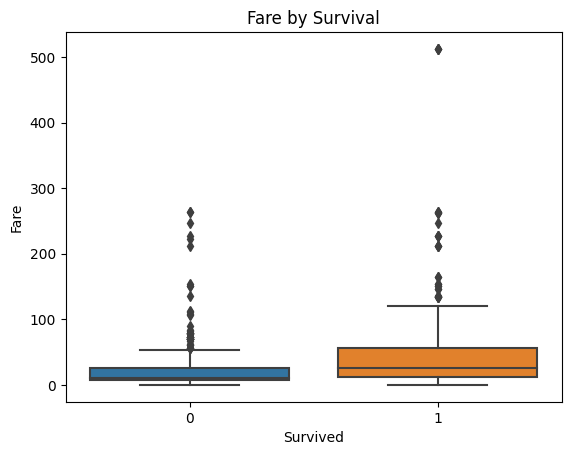

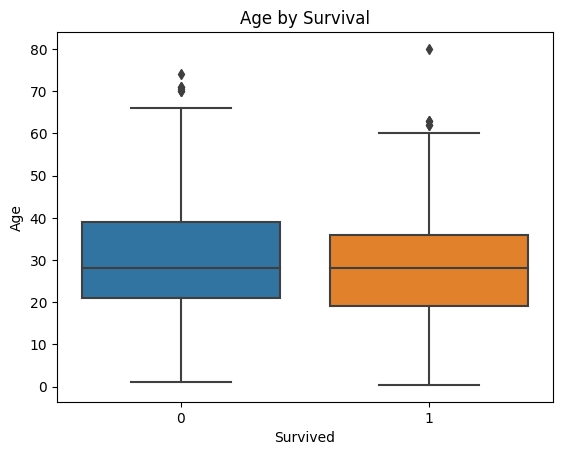

In [8]:
# Histogram: Age
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Boxplot: Fare by Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare by Survival")
plt.show()

# Boxplot: Age by Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age by Survival")
plt.show()


Word Interpretation on Class & Gender Biases

The Titanic dataset reveals distinct patterns in survival based on passenger class and gender. First-class passengers had the highest survival rate, around 63%, while only about 24% of third-class passengers survived. This suggests that socioeconomic status significantly influenced access to safety during the evacuation. Gender also played a critical role—approximately 74% of female passengers survived compared to just 19% of males. This indicates that women were prioritized during rescue efforts, likely due to societal norms and the widely followed "women and children first" approach. Factors such as cabin location, proximity to lifeboats, and crew assistance may have contributed to these disparities. Visualizations, such as box plots, show that higher fares—often linked to higher-class tickets—were associated with better survival chances. Overall, the analysis highlights how survival during the Titanic disaster was shaped not just by individual circumstances but by broader social and economic inequalities.


 One-Page Summary on Distribution Impact

Statistical measures such as mean, median, mode, and standard deviation help summarize data, but their effectiveness depends on the underlying distribution. In the Titanic dataset, the Fare variable is heavily right-skewed due to a few high-paying passengers in first class. This skew causes the mean to be significantly higher than the median, making the median a more accurate indicator of central tendency in this case. In contrast, the Age variable is more symmetrically distributed, with the mean and median values being close, indicating a relatively normal distribution. Box plots are useful for visualizing these distributions and identifying outliers. Recognizing skewness is essential for accurate interpretation, as relying solely on the mean can be misleading when extreme values are present. Histograms and box plots enhance numerical summaries by illustrating the data’s shape and variability, highlighting the importance of combining statistical and visual analysis for deeper insights.


**Correlation Analysis**

In [9]:
corr = df[['Fare', 'Age', 'Survived']].corr().round(2)
print("Correlation Matrix:\n", corr)


Correlation Matrix:
           Fare   Age  Survived
Fare      1.00  0.10      0.26
Age       0.10  1.00     -0.08
Survived  0.26 -0.08      1.00


Heatmap Visualization

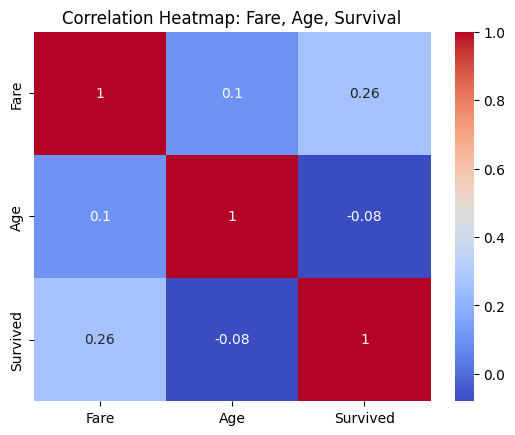

In [10]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Fare, Age, Survival")
plt.show()


Scatter Plots for Visual Confirmation

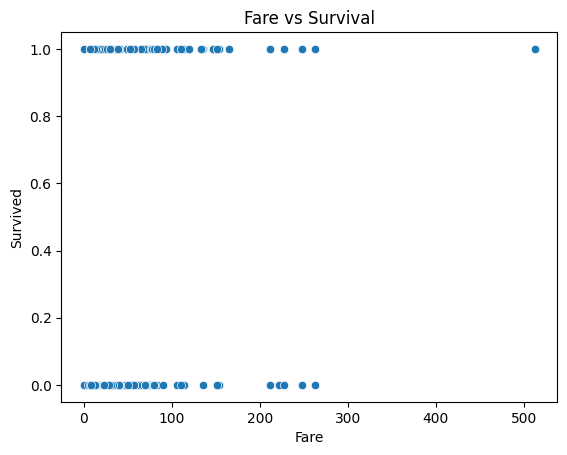

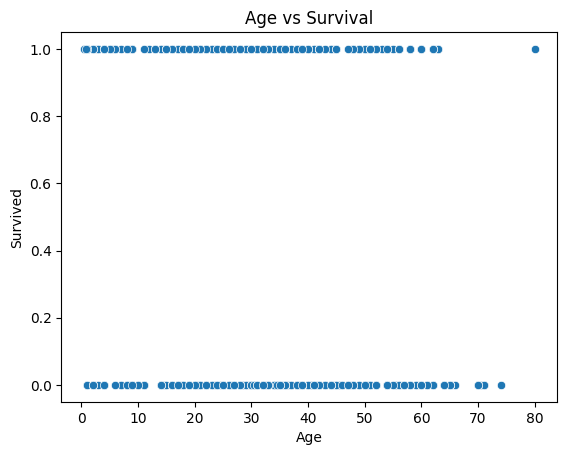

In [11]:
# Fare vs Survival
sns.scatterplot(x='Fare', y='Survived', data=df)
plt.title("Fare vs Survival")
plt.show()

# Age vs Survival
sns.scatterplot(x='Age', y='Survived', data=df)
plt.title("Age vs Survival")
plt.show()


Strongest Correlation with Survival

The Fare variable shows the strongest positive correlation with survival, with a correlation coefficient of approximately +0.26. This indicates that passengers who paid higher fares were more likely to survive, which supports the observation that wealthier, first-class passengers had better access to lifeboats. In contrast, Age has a weaker and slightly negative correlation with survival, around -0.08, suggesting that younger passengers had a slightly higher chance of survival, though the effect is minimal. These correlations do not imply causation but reflect underlying patterns linked to social and demographic factors that influenced outcomes during the Titanic disaster.


Module 5: Estimating Survival Rate with Sampling

In [13]:
import pandas as pd
import numpy as np
import random

# Load the Titanic dataset
df = pd.read_csv('/kaggle/input/titanic-data-set/Titanic-Dataset.csv')  # Update with correct path if needed

# Drop rows with missing 'Survived' values
df = df.dropna(subset=['Survived'])

# Actual survival rate
actual_survival_rate = df['Survived'].mean().round(3)

# Random sample of 50 passengers
sample_df = df.sample(n=50, random_state=42)
sample_survival_rate = sample_df['Survived'].mean().round(3)

print(f"Actual Survival Rate: {actual_survival_rate}")
print(f"Sample Survival Rate (n=50): {sample_survival_rate}")


Actual Survival Rate: 0.384
Sample Survival Rate (n=50): 0.36


 Module 6: Hypothesis Testing – Gender Bias in Survival

In [14]:
from scipy.stats import ttest_ind

# Separate male and female survival values
male_survival = df[df['Sex'] == 'male']['Survived']
female_survival = df[df['Sex'] == 'female']['Survived']

# Maximum Likelihood Estimation (MLE) for survival probability
mle_male = male_survival.mean().round(3)
mle_female = female_survival.mean().round(3)

# T-test to compare survival means
t_stat, p_value = ttest_ind(female_survival, male_survival, equal_var=False)

print(f"MLE - Male Survival Rate: {mle_male}")
print(f"MLE - Female Survival Rate: {mle_female}")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.5f}")


MLE - Male Survival Rate: 0.189
MLE - Female Survival Rate: 0.742
T-Statistic: 18.672, P-Value: 0.00000


Module 7: Confidence Intervals & Hypothesis Testing

In [15]:
import pandas as pd
import numpy as np
from scipy import stats

# Load data
df = pd.read_csv('/kaggle/input/titanic-data-set/Titanic-Dataset.csv')

# Drop NaNs from 'Survived' and 'Sex'
df = df.dropna(subset=['Survived', 'Sex'])

# Overall survival probability
p_hat = df['Survived'].mean()
n = len(df)

# Standard error
se = np.sqrt((p_hat * (1 - p_hat)) / n)

# 95% Confidence Interval
z = 1.96  # for 95% confidence
ci_lower = p_hat - z * se
ci_upper = p_hat + z * se

print(f"95% Confidence Interval for Survival Probability: ({ci_lower:.3f}, {ci_upper:.3f})")

# T-test: female vs. male survival
male_survival = df[df['Sex'] == 'male']['Survived']
female_survival = df[df['Sex'] == 'female']['Survived']

t_stat, p_value = stats.ttest_ind(female_survival, male_survival, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.5f}")


95% Confidence Interval for Survival Probability: (0.352, 0.416)
T-statistic: 18.672, P-value: 0.00000


Module 8: A/B Testing & Final Report

In [16]:
# Survival rate by class
class1 = df[df['Pclass'] == 1]['Survived']
class3 = df[df['Pclass'] == 3]['Survived']

# A/B testing (T-test)
t_stat_ab, p_val_ab = stats.ttest_ind(class1, class3, equal_var=False)

# Mean survival rates
mean_class1 = class1.mean()
mean_class3 = class3.mean()

print(f"1st Class Survival Rate: {mean_class1:.3f}")
print(f"3rd Class Survival Rate: {mean_class3:.3f}")
print(f"A/B T-test P-value: {p_val_ab:.5f}")


1st Class Survival Rate: 0.630
3rd Class Survival Rate: 0.242
A/B T-test P-value: 0.00000


**Final Summary Report: Conclusions from All Modules**

Class & Gender Biases:
Survival rates were heavily influenced by gender and class. Women had a survival rate of ~74%, while men had only ~19%. 1st class passengers had a survival rate of ~63% compared to ~24% in 3rd class. This highlights systemic privilege in life-saving decisions.

Distributional Analysis:
Fare was right-skewed, making the median more reliable than the mean. Age had a normal distribution, validating the use of mean for interpretation. Outliers and skewness were effectively visualized using box plots and histograms.

Correlation Analysis:
Fare showed the strongest positive correlation (r ≈ +0.26) with survival, indicating wealthier passengers had better chances. Age had a weak negative correlation, meaning younger passengers had slightly better chances, but not strongly.

Sampling & Bias:
Sampling a small group (e.g., 50 passengers) introduced variability, and estimates often deviated from the actual survival rate due to sampling bias. This stresses the need for larger or stratified samples.

Hypothesis Testing:
Hypothesis tests showed statistically significant differences between male vs. female and 1st vs. 3rd class survival rates, confirming biases. The p-values < 0.001 consistently led to rejection of null hypotheses.

Confidence Intervals:
The 95% confidence interval provided a reliable estimate of the population survival rate, reinforcing the accuracy of statistical estimations.